# Decorators
To modify the behaviour of functions

In [1]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User!")
        res = func(*args, **kwargs)
        print(f"Function Results : {res}")
        print("Thank you")
        return res

    return wrapper

# How to apply a decorater
@decorator_name

In [4]:
@welcome
def simple_interest(p: float, n: float, r: float) -> tuple:
    i = (p * n * r) / 100
    a = p + i
    return i, a

In [5]:
i1, a1 = simple_interest(p=50_000, n=3, r=6.8)

Welcome User!
Function Results : (10200.0, 60200.0)
Thank you


In [6]:
i1

10200.0

In [7]:
a1

60200.0

In [8]:
i2, a2 = simple_interest(p=80_000, n=5, r=7.1)

Welcome User!
Function Results : (28400.0, 108400.0)
Thank you


In [9]:
i2

28400.0

In [10]:
a2

108400.0

In [11]:
import math

In [12]:
@welcome
def hypotenuse(a: float, b: float) -> float:
    c = math.sqrt(a**2 + b**2)
    return c

In [13]:
h1 = hypotenuse(3, 4)

Welcome User!
Function Results : 5.0
Thank you


In [14]:
h1

5.0

In [15]:
h2 = hypotenuse(a=12, b=13.5)

Welcome User!
Function Results : 18.062391868188442
Thank you


In [16]:
h2

18.062391868188442

# Create a decorator to measure time required for function to execute

In [17]:
import time

time.sleep(3)
print("Hello")

Hello


# Measuring time requried to execute

In [20]:
# start measuring time
start = time.perf_counter()

# Write the code to execute
time.sleep(2)
print("Test")
time.sleep(3)
print("Test 2")

# stop measuring time
stop = time.perf_counter()

# Calculate elapsed time
elapsed = stop - start

# Print time required
print(f"Time Required : {elapsed:.2f} sec")

Test
Test 2
Time Required : 5.00 sec


In [31]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        # Start measuring time
        start = time.perf_counter()
        # Calulate and print function results
        res = func(*args, **kwargs)
        # Print the results
        print(f"Function Results : {res}")
        # Stop measuring time
        stop = time.perf_counter()
        # Excution time
        elapsed = stop - start
        # Print the execution time
        print(f"Excution Time : {elapsed:.2f} sec")
        return res

    return wrapper

In [32]:
@measure_time
def square(n: int) -> int:
    time.sleep(7)
    return n**2

In [33]:
s1 = square(4)

Function Results : 16
Excution Time : 7.00 sec


In [34]:
s1

16

In [35]:
s2 = square(11)

Function Results : 121
Excution Time : 7.01 sec


In [36]:
a = [1, 3, 11, 12, 14, 15]

In [46]:
@measure_time
def square_list(nums: list[int]) -> list[int]:
    sqrs = []
    for i in nums:
        time.sleep(1)
        s = i**2
        print(s)
        sqrs.append(s)

    return sqrs

In [47]:
a

[1, 3, 11, 12, 14, 15]

In [48]:
len(a)

6

In [49]:
a1 = square_list(a)

1
9
121
144
196
225
Function Results : [1, 9, 121, 144, 196, 225]
Excution Time : 6.02 sec


In [50]:
a1

[1, 9, 121, 144, 196, 225]

In [51]:
b = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
len(b)

10

In [52]:
b1 = square_list(b)

121
144
169
196
225
256
289
324
361
400
Function Results : [121, 144, 169, 196, 225, 256, 289, 324, 361, 400]
Excution Time : 10.07 sec


In [53]:
b1

[121, 144, 169, 196, 225, 256, 289, 324, 361, 400]

# Write a function to download a file and measure the time requried

In [54]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv


In [55]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'refs',
 'heads',
 'main',
 'artifacts',
 'data.csv']

In [56]:
url1.split("/")[-1]

'data.csv'

In [60]:
from urllib.request import urlretrieve


@measure_time
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"Downloading File : {filename} ...")
    urlretrieve(url, filename)
    print(f"{filename} download successful!")

In [61]:
url1

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv'

In [62]:
download_file(url1)

data.csv download successful!
Function Results : None
Excution Time : 2.30 sec


In [63]:
url2 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/train.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/train.csv


In [64]:
download_file(url2)

train.csv download successful!
Function Results : None
Excution Time : 2.16 sec


# Load file as dataframe

In [65]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [66]:
df.shape

(193573, 11)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


# Show the average price by Cut

In [75]:
a = df.groupby("cut").agg({"price": ["mean", "std"]}).round(2)

a

price         
              mean      std
cut                        
Fair       4810.50  3873.97
Good       4191.47  3596.30
Ideal      3396.19  3808.18
Premium    4797.06  4366.52
Very Good  4165.30  4028.44

<Axes: xlabel='cut'>

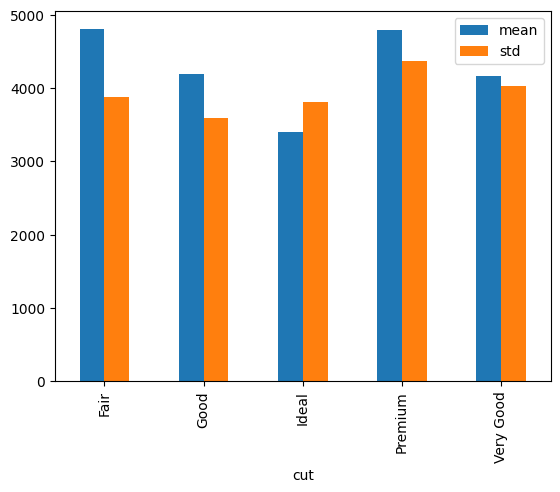

In [77]:
a["price"].plot(kind="bar")

In [81]:
df.groupby(by="cut").describe(exclude="object").T.loc["price"].round(2)

cut,Fair,Good,Ideal,Premium,Very Good
count,2021.00,11622.00,92454.00,49910.00,37566.00
mean,4810.50,4191.47,3396.19,4797.06,4165.30
std,3873.97,3596.30,3808.18,4366.52,4028.44
min,367.00,335.00,326.00,326.00,326.00
25%,2378.00,1437.00,871.00,1103.00,1050.00
50%,3669.00,3592.50,1752.00,3741.50,2903.00
75%,5408.00,5127.00,4580.00,6580.00,5448.50
max,18791.00,18804.00,18818.00,18818.00,18818.00
